In [1]:
import tensorflow.keras
import tensorflow as tf
from homemade_unet import unet_model_3d
from unet_git_orig import unet_model_3d as unet_git
from tensorflow.keras.models import load_model
import os

In [2]:
input_shape = (1,64,64,64)
model = unet_model_3d(input_shape = input_shape, n_labels = 3)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 64, 64, 6 0                                            
__________________________________________________________________________________________________
lvl1_Conv3D1 (Conv3D)           (None, 64, 64, 64, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64, 64, 64, 6 256         lvl1_Conv3D1[0][0]               
__________________________________________________________________________________________________
activation (Activation)         (None, 64, 64, 64, 6 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [10]:
model2 = unet_git(input_shape=input_shape, n_labels=3)
model2.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1, 64, 64, 6 0                                            
__________________________________________________________________________________________________
conv3d_45 (Conv3D)              (None, 32, 64, 64, 6 896         input_5[0][0]                    
__________________________________________________________________________________________________
activation_63 (Activation)      (None, 32, 64, 64, 6 0           conv3d_45[0][0]                  
__________________________________________________________________________________________________
conv3d_46 (Conv3D)              (None, 64, 64, 64, 6 55360       activation_63[0][0]              
____________________________________________________________________________________________

In [11]:
print(os.listdir('models/best/'))
#model.load_weights('models/best/tversky_full_first_model.h5')
model2.load_weights('pretrained/tumor_segmentation_weights.h5')
#model = load_model('models/tumor_segmentation_weights.h5')

['tversky_full_first_model.h5', 'overfit_tversky_correct_model_stop.h5']


ValueError: You are trying to load a weight file containing 18 layers into a model with 15 layers.

In [4]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import pylab as plt

#sample_image = "/home/jupyter/ai_postgraduate_project/data/raw_dataset/labelsTr/pancreas_001.nii.gz"
sample_image = "/home/jaume/Documentos/DL_postgraduate/final_project/sample_data/labelsTr/pancreas_004.nii.gz"
img = nib.load(sample_image)
img = np.array(img.dataobj)

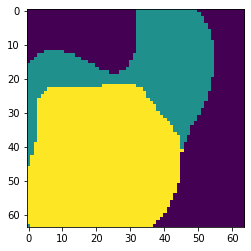

In [6]:
plt.imshow(img[250:314,250:314,50])

In [7]:
import tensorflow as tf

In [8]:
import tensorflow as tf
#sample_image = "/home/jupyter/ai_postgraduate_project/data/raw_dataset/imagesTr/pancreas_001.nii.gz"
sample_image = "/home/jaume/Documentos/DL_postgraduate/final_project/sample_data/imagesTr/pancreas_004.nii.gz"
img = nib.load(sample_image)
img = np.array(img.dataobj)
img = img[250:314,250:314,:64]
img = img/1024
res = model.predict(np.expand_dims(np.expand_dims(img,axis=0),axis=0))

In [9]:
res.shape

(1, 3, 64, 64, 64)

In [20]:
res[0,0,:,:,:].max()

1.0

In [10]:
round_res=np.where(res[0,1:,:,:,:] > 0.5,1,0)

No handles with labels found to put in legend.


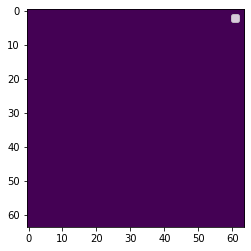

In [16]:
plt.imshow(round_res[1,:,:,42])
plt.legend()